**06 비지도 학습 Unsupervised learning**
====

**06-3 주성분 분석**
----

**차원 Demension** : 데이터가 가진 속성 = 특성   
ex) 과일 사진의 경우 10,000개의 픽셀 = 10,000개의 특성

**차원 축소 Dimensionally reduction 알고리즘** : 비지도 학습   
특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다   
**차원축소**는 데이터를 가장 잘 나타내는 일부 특성을 선택 -> 데이터 크기를 줄임 -> 지도 학습 모델의 성능 향상   
복원도 가능

- 대표적 차원 축소 알고리즘 : **주성분 분석 Principal Component Analysis (PCA)**
 

분산 : 데이터가 널리 퍼져있는 정도   
PCA는 데이터에 있는 *분산이 큰 방향을 찾는 것* = 데이터를 잘 표현하는 어떤 벡터와 같다   
여기서 **벡터** = **주성분**, 즉 주성분 백터 = 원본 데이터에 있는 어떤 방향   

주성분 벡터의 원소 개수 = 원본 데이터셋에 있는 특성 개수   

샘플 데이터 s(2,4)를 주성분(벡터)에 **직각**으로 투영하면 1차원 데이터 p(3.58)를 만들 수 있다   
s = sample, p = projection, 3.58 = 벡터로부터 s(2,4)가 떨어져 있는 거리(주성분 공간에서의 좌표값, 1차원 위치 정보)

- 주성분은 원본 차원과 같다
- 주성분으로 바꾼 데이터는 차원이 줄어든다

In [19]:
!wget http://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2025-11-11 09:48:07--  http://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-11 09:48:07--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-11 09:48:08--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... con

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


비지도 학습에서는 fit() 메서드의 타깃값을 제공하지 않는다

In [21]:
print(pca.components_.shape)

(50, 10000)


첫 번째 차원(50) : 주성분 갯수   
두 번째 차원(10000) : 원본 데이터의 특성 개수

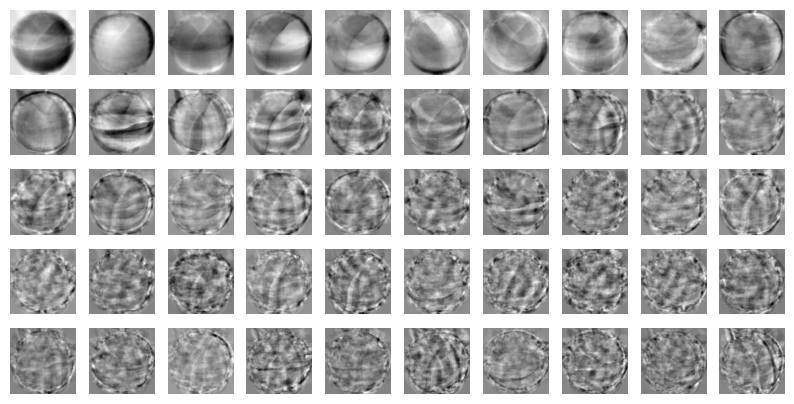

In [22]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n=len(arr)  
    rows=int(np.ceil(n/10)) 
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [23]:
print(fruits_2d.shape)

(300, 10000)


In [24]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


*50개의 주성분을 찾은 PCA 모델*을 사용해 (300, 50) 크기의 배열로 변환   
fruits_pca : 50개의 특성을 가진 데이터   
10,000개의 특성을 50개로 줄임 -> 어느 정도 손실이 발생할 수 밖에 없음 -> 재구성할 수 있음

In [25]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


inverse_transform() : 복원 메서드

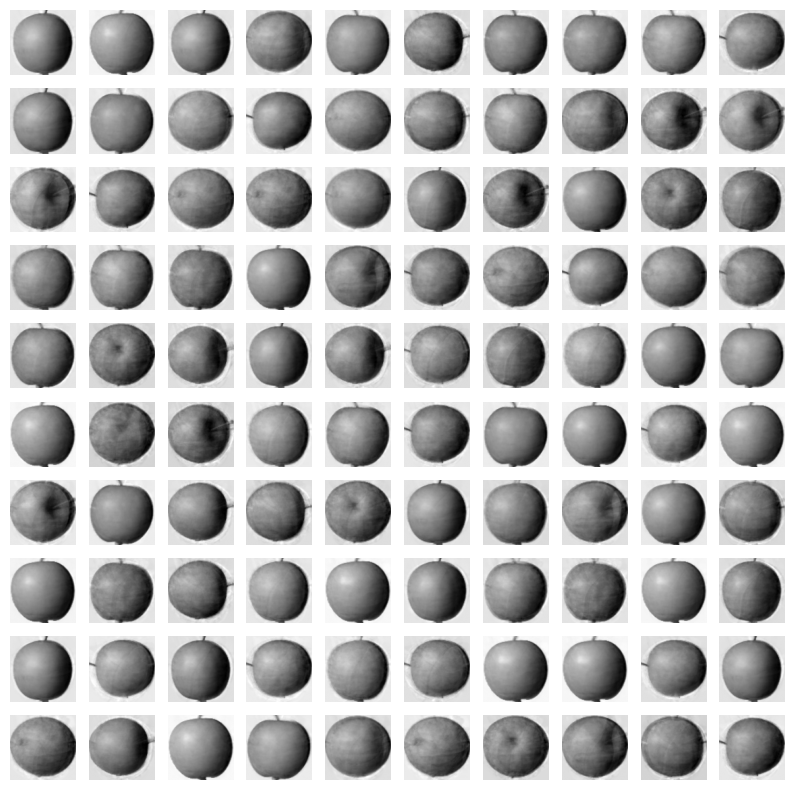

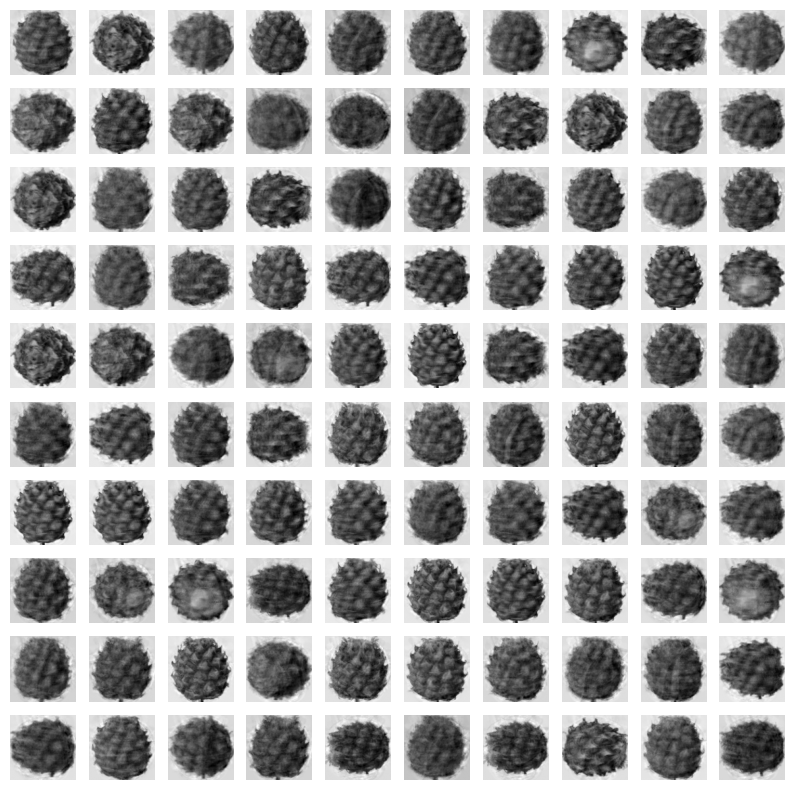

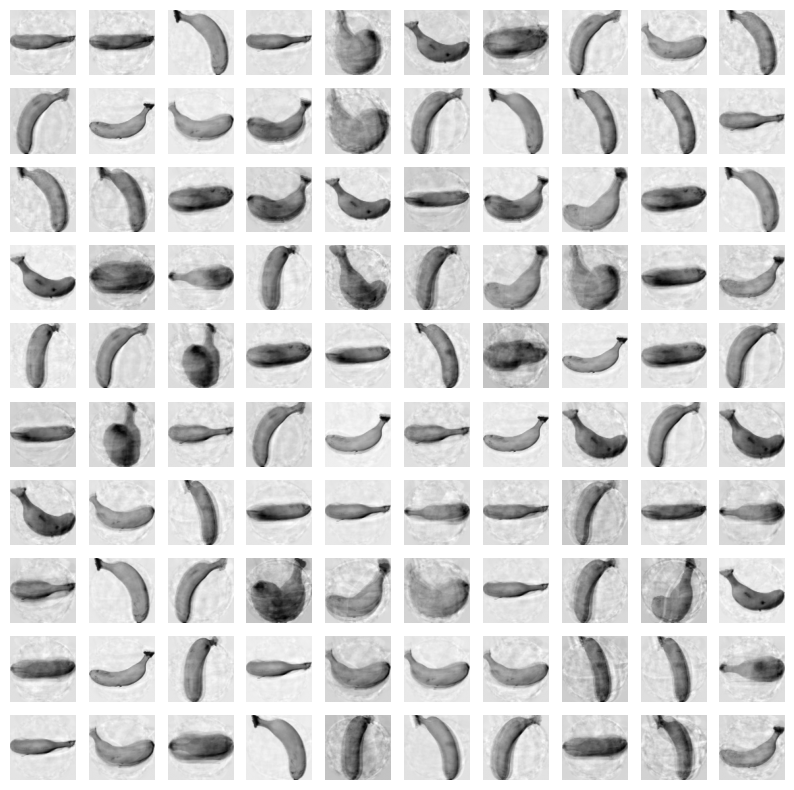

In [26]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

**설명된 분산 Explained Variance** : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [27]:
print(np.sum(pca.explained_variance_ratio_))

0.9215174608149727


PCA 클래스의 explained_variance_ratio_ : 각 주성분의 설명된 분산 비율

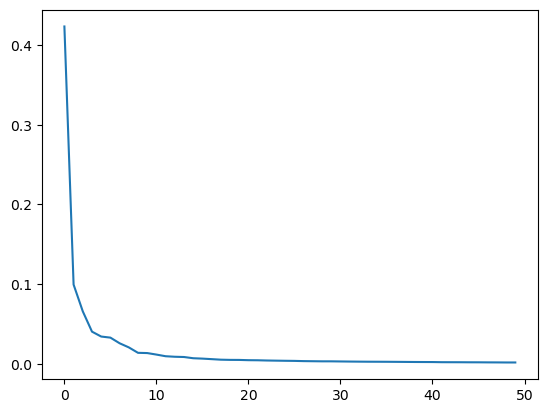

In [28]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

그래프에서 처음 10개의 주성분이 대부분의 분산을 표현   
그다음부터는 각 주성분이 설명하고 있는 분산이 비교적 작다    

**과일 사진 원본 데이터**와 **PCA로 축소한 데이터**를 **지도 학습**에 적용해서 어떤 차이가 있는지 확인

In [29]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

지도 학습 모델은 타깃값이 있어야 한다   
사과 : 0, 파인애플 : 1, 바나나 : 2   


In [33]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [35]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.12271561622619628


In [37]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.012935447692871093


정확도는 똑같지만, 훈련 시간이 감소됨 -> 차원을 축소하면 **저장 공간**과 **머신러닝 모델의 훈련 속도를 높임**

In [39]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

,n_components,0.5
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


분산의 비율을 입력할 수 있음 (0~1 사이의 비율을 실수로 입력)   
PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다.

In [40]:
print(pca.n_components_)

2


In [42]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [43]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.012226533889770509


/home/suhyeonmin/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/suhyeonmin/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-le

In [44]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아봄   
fruits_pca로 찾은 클러스터는 각각 110개, 99개, 91개   
-> 원본 데이터를 사용했을 떄와 거의 비슷한 결과

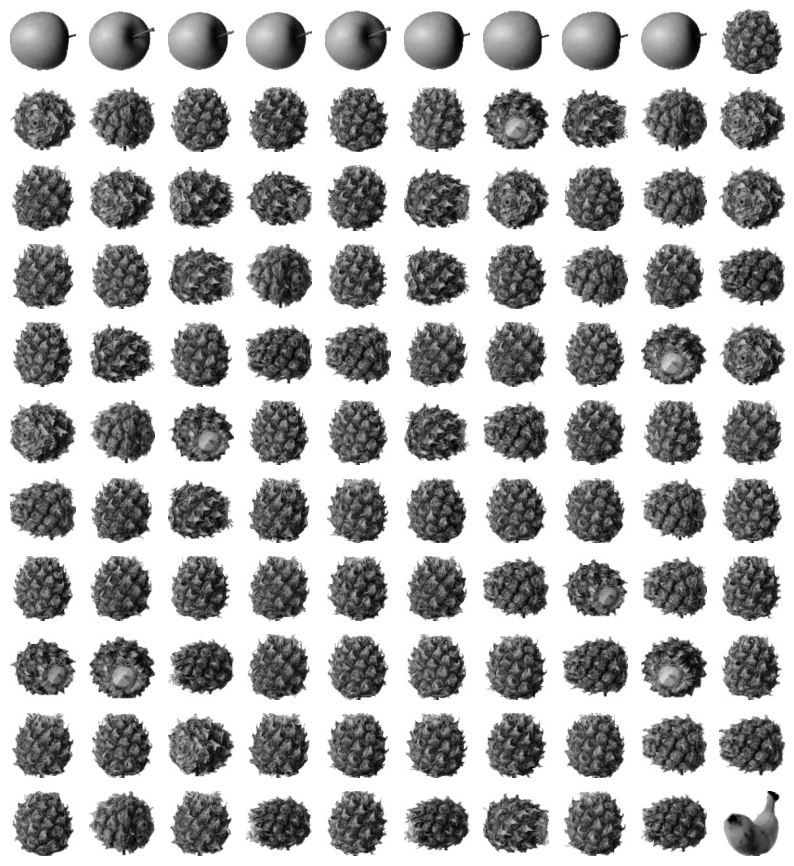

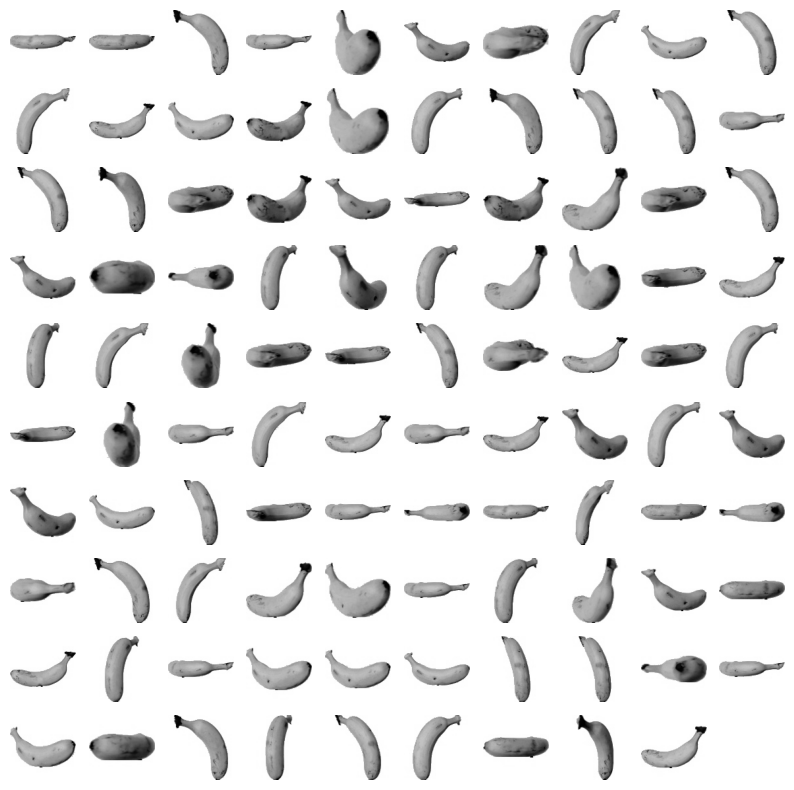

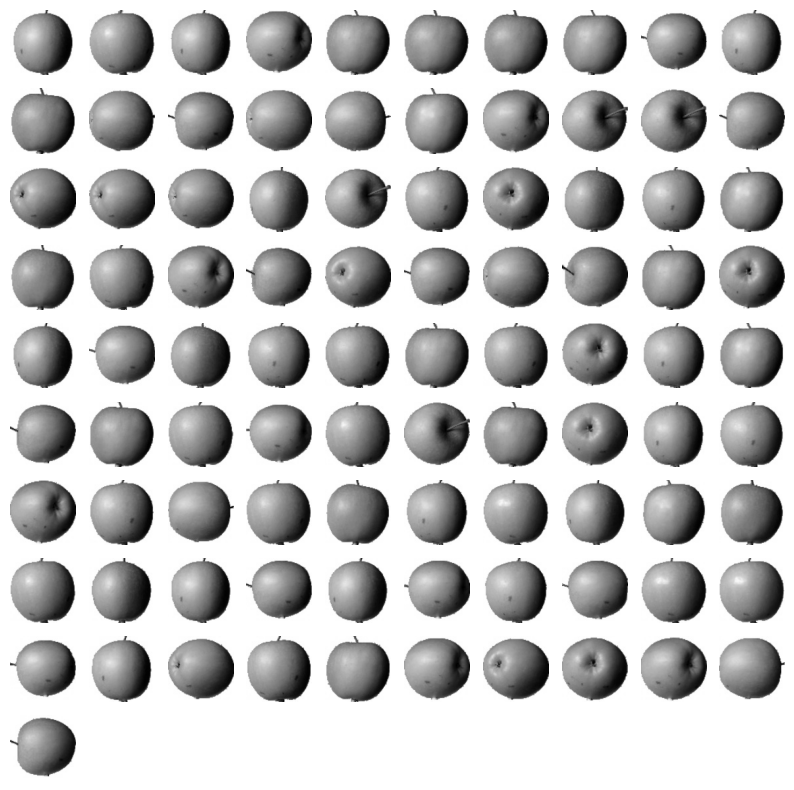

In [46]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

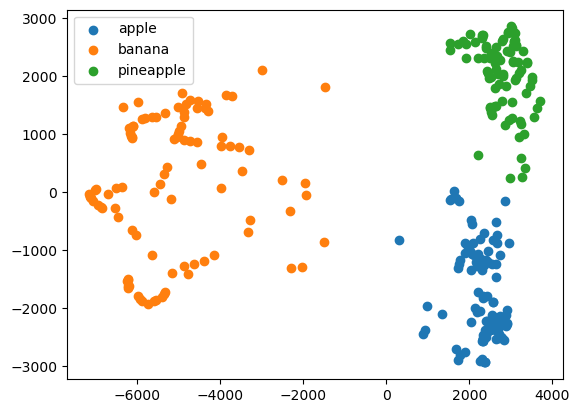

In [47]:
for label in range(0, 3):
    data =  fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()

km.labels_ : 클러스터별로 나누어 산점도 그림   

차원을 줄이면 **시각화**에도 도움이 됨   
**3개 이하**로 차원을 줄이면 화면에 출력하기 비교적 쉬움    

fruits_pca 데이터는 2개의 특성 -> 2차원으로 표현   

data[:,0] **(x축)**, data[:,1] **(y축)** -> 특성이 2개이므로 x,y축으로 산점도 그릴 수 있는듯?   

산점도에서는 apple, pineapple의 경계가 모호하다   
이때, 시각화가 더 도움될 수 있다 (시각화에선 차원축소가 유용)
